# Задание 5

Постройте траекторию спуска различных алгоритмов из одной и той же исходной точки с одинаковой точностью. В отчете наложить эту траекторию на рисунок с линиями равного уровня заданной функции.

In [34]:
from helper import *

import numpy as np

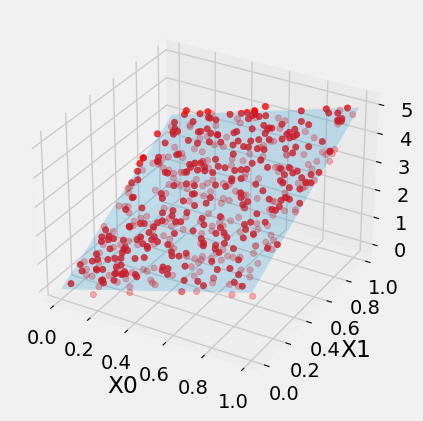

In [35]:
def generate():
    real_weight_1, real_weight_2, real_bias = 2, 3, 0
    dots_count = 500
    variance = 0.5
    X_data = np.random.rand(dots_count, 2)
    y_data = (real_weight_1*X_data[:, 0] + real_weight_2*X_data[:, 1] + real_bias + (np.random.rand(dots_count) * variance - variance / 2)).reshape(-1, 1)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Определяем координаты точек выше плоскости
    above_plane = y_data.squeeze() > real_weight_1*X_data[:, 0] + real_weight_2*X_data[:, 1] + real_bias

    # Выводим точки, находящиеся выше плоскости
    ax.scatter(X_data[above_plane, 0], X_data[above_plane, 1], y_data[above_plane], color='red', alpha=0.8)

    # Выводим точки, находящиеся ниже плоскости
    ax.scatter(X_data[~above_plane, 0], X_data[~above_plane, 1], y_data[~above_plane], color='red', alpha=0.3)

    # Выводим плоскость
    xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
    zz = real_weight_1*xx + real_weight_2*yy + real_bias
    ax.plot_surface(xx, yy, zz, alpha=0.2)

    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('y')

    plt.show()

    return X_data, y_data

X_data, y_data = generate()

In [36]:
def mse_loss(theta):
    y_hat = np.dot(X_data, theta)
    mse = np.mean((y_data - y_hat) ** 2)
    return mse

x_lin = np.linspace(0, 5, 60, dtype=float)
y_lin = np.linspace(0, 5, 60, dtype=float)
X, Y = np.meshgrid(x_lin, y_lin)
# Z = np.vectorize(lambda x, y: mse_loss([x, y]))(X, Y)
# x0 = np.array([0.0, 0.0], dtype=float)
x0 = np.random.rand(2, 1) * 1

x0 = np.array([x0[0][0], x0[1][0]])
print(x0)

[0.1487151 0.8545792]


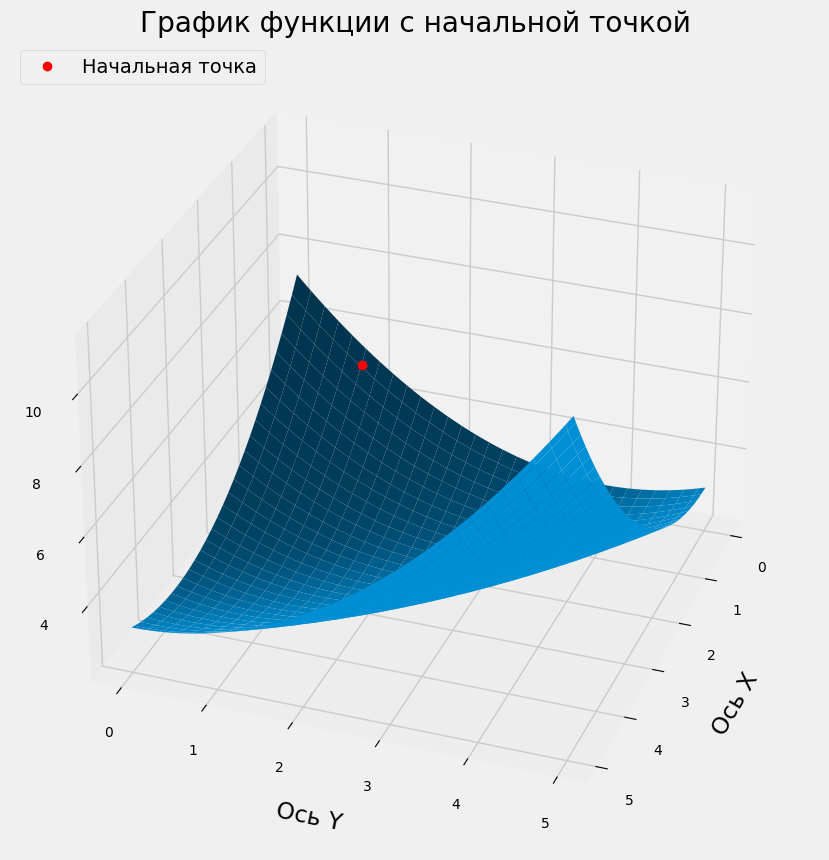

In [37]:
f_info = file_info_3d(X, Y, mse_loss, x0)

print_f(f_info, azim=20)

Mini-batch - 9
Momentum - 6
Nesterov - 7
Adagrad - 69
RMSProp - 10
Adam - 4
Mini-batch      ==>   2.476390 in [  1.135813,   1.915584]
Momentum        ==>   2.454448 in [  1.124434,   1.963031]
Nesterov        ==>   2.217624 in [  1.364115,   2.116827]
Adagrad         ==>   2.569463 in [  1.060504,   1.870557]
RMSProp         ==>   2.476121 in [  1.142179,   1.908452]
Adam            ==>   2.438853 in [  1.192923,   1.905861]


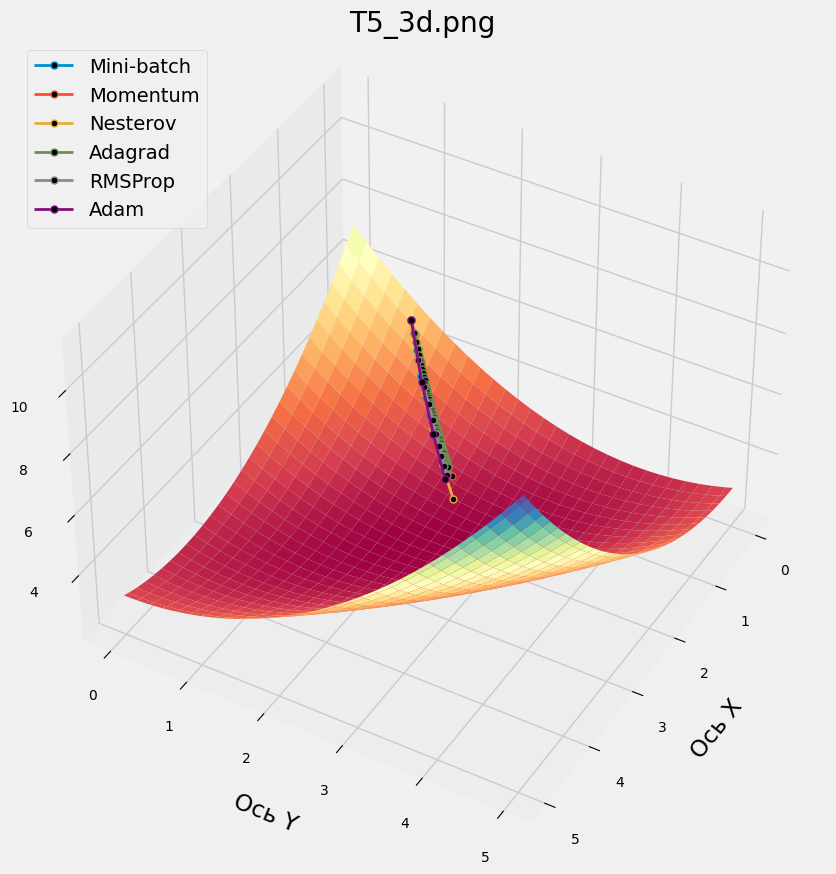

In [38]:
loss_real = minibatch_library(X_data, y_data).get_loss_history([[2, 3]])[-1]

eps = loss_real*0.9

mb = minibatch_multi_library(X_data, y_data, batch_size=70)
visited_points_mini_batch = mb.gradient_descent(x0, max_epochs=1000, initial_lr=0.001, eps=eps, apply_min=True, apply_value=True)
mb_momentum = minibatch_momentum(X_data, y_data, batch_size=70)
visited_points_mini_batch_momentum = mb_momentum.gradient_descent(x0, max_epochs=1000, initial_lr=0.0005, eps=eps, apply_min=True, apply_value=True)
mb_Nesterov = minibatch_Nesterov(X_data, y_data, batch_size=70)
visited_points_mini_batch_Nesterov = mb_Nesterov.gradient_descent(x0, max_epochs=1000, initial_lr=0.0005, eps=eps, apply_min=True, apply_value=True)
mb_Adagrad = minibatch_adagrad(X_data, y_data, batch_size=70)
visited_points_mini_batch_Adagrad = mb_Adagrad.gradient_descent(x0, max_epochs=1000, initial_lr=0.1, eps=eps, eps_adagrad=1e-5, apply_min=True, apply_value=True)
mb_RMSProp = minibatch_RMSProp(X_data, y_data, batch_size=70)
visited_points_mini_batch_RMSProp = mb_RMSProp.gradient_descent(x0, max_epochs=1000, initial_lr=0.1, eps=eps, eps_RMSProp=1e-5, apply_min=True, apply_value=True)
mb_Adam = minibatch_Adam(X_data, y_data, batch_size=70)
visited_points_mini_batch_Adam = mb_Adam.gradient_descent(x0, max_epochs=1000, initial_lr=5e-1, eps=eps, eps_Adam=1e-8, apply_min=True, apply_value=True)

result = [np.array(visited_points_mini_batch), 
          np.array(visited_points_mini_batch_momentum), 
          np.array(visited_points_mini_batch_Nesterov),
          np.array(visited_points_mini_batch_Adagrad),
          np.array(visited_points_mini_batch_RMSProp),
          np.array(visited_points_mini_batch_Adam)]
result_label = ['Mini-batch', 'Momentum', 'Nesterov',
                 'Adagrad', 
                 'RMSProp', 'Adam']

for i in range(len(result)):
    print(result_label[i] + ' - ' + str(len(result[i])))

print_full_grad(f_info, result, result_label, title='T5_3d.png', elev=40, azim=30)

Mini-batch      ==>   2.476390 in [  1.135813,   1.915584]
Momentum        ==>   2.454448 in [  1.124434,   1.963031]
Nesterov        ==>   2.217624 in [  1.364115,   2.116827]
Adagrad         ==>   2.569463 in [  1.060504,   1.870557]
RMSProp         ==>   2.476121 in [  1.142179,   1.908452]
Adam            ==>   2.438853 in [  1.192923,   1.905861]


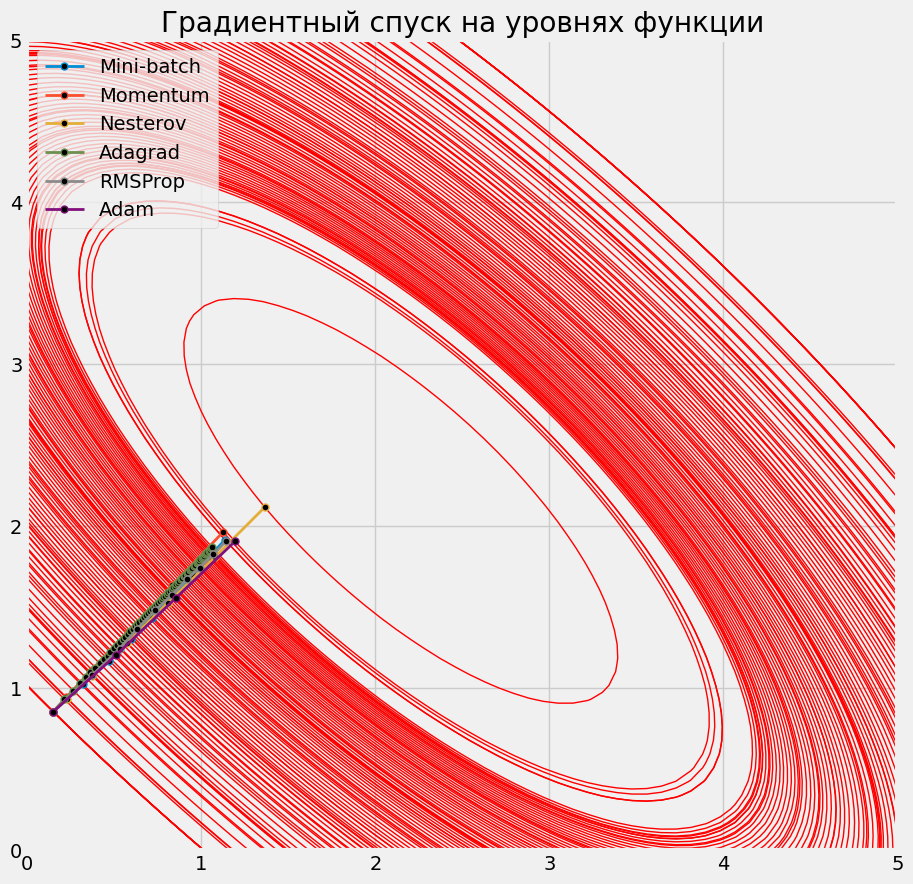

In [39]:
print_lines_grad(f_info, result, result_label)